# その他のデータフレーム操作

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

### DataFrame を array に変換する例です。

In [2]:
data = {'City': ['Tokyo', 'Osaka', 'Nagoya', 'Okinawa'],
                 'Temperature': [25.0, 28.2, 27.3, 30.9],
                 'Humidity': [44, 42, np.nan, 62]}
cities = DataFrame(data)
cities

,City,Humidity,Temperature
0,Tokyo,44.0,25.0
1,Osaka,42.0,28.2
2,Nagoya,NaN,27.3
3,Okinawa,62.0,30.9


In [3]:
cities.as_matrix()

array([['Tokyo', 44.0, 25.0],
       ['Osaka', 42.0, 28.2],
       ['Nagoya', nan, 27.3],
       ['Okinawa', 62.0, 30.9]], dtype=object)

### Series を array に変換する例です。

In [4]:
cities['City'].as_matrix()

array(['Tokyo', 'Osaka', 'Nagoya', 'Okinawa'], dtype=object)

### トランプのカードを集めた DataFrame を定義して、カードのシャッフルを行う例です。

In [5]:
face = ['king', 'queen', 'jack', 'ten', 'nine', 'eight',
        'seven', 'six', 'five', 'four', 'three', 'two', 'ace']

suit = ['spades', 'clubs', 'diamonds', 'hearts']

value = range(13, 0, -1)

deck = DataFrame({'face': np.tile(face, 4),
                  'suit': np.repeat(suit, 13),
                  'value': np.tile(value, 4)})

deck.head()

,face,suit,value
0,king,spades,13
1,queen,spades,12
2,jack,spades,11
3,ten,spades,10
4,nine,spades,9


permutation 関数で、index の順番をランダムにシャッフルします。

In [6]:
np.random.permutation(deck.index)

array([33,  6, 21, 39, 41, 44, 34, 13, 29, 48, 17, 47, 20,  9,  7, 49, 11,
       51, 24,  0,  4,  3, 22, 31, 10, 43, 45, 50, 37, 28, 16, 26, 38,  2,
       32, 36, 27, 23, 12,  1, 19, 30, 35, 42,  5, 46, 25, 18, 15,  8, 40,
       14])

ランダムにシャッフルした index を用いて行を並べ替えます。

In [7]:
deck = deck.reindex(np.random.permutation(deck.index))
deck.head()

,face,suit,value
31,eight,diamonds,8
18,eight,clubs,8
13,king,clubs,13
51,ace,hearts,1
4,nine,spades,9


reset_index メソッドで index に通し番号を付け直します。

In [8]:
deck = deck.reset_index(drop=True)
deck.head()

,face,suit,value
0,eight,diamonds,8
1,eight,clubs,8
2,king,clubs,13
3,ace,hearts,1
4,nine,spades,9


### DataFrame のグラフ描画機能を使用する例です。

3回分のランダムウォークのデータを並べた DataFrame を作成します。

In [9]:
result = DataFrame()
for c in range(3):
    y = 0
    t = []
    for delta in np.random.normal(loc=0.0, scale=1.0, size=100):
        y += delta
        t.append(y)
    result['Trial %d' % c] = t

result.head()

,Trial 0,Trial 1,Trial 2
0,-0.095139,1.166378,0.224386
1,1.514571,0.884538,1.307100
2,1.374218,0.256557,1.561603
3,0.690983,-0.186207,0.116453
4,1.220171,-1.868510,-0.874419


DataFrame の polot メソッドでグラフを描きます。

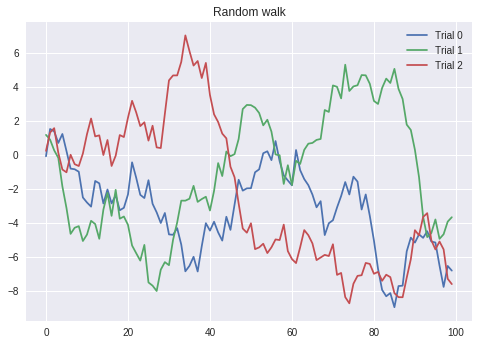

In [10]:
result.plot(title='Random walk')